In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#data sets
df = pd.read_csv('data/fruit2class.csv')

df.sample(7)

,m,d,target
2,6.5,5.5,0
14,8.7,3.5,0
10,8.9,5.2,0
4,6.9,5.9,0
0,6.0,4.2,0
1,5.7,3.6,0
8,7.5,3.8,1


In [3]:
df.isnull().sum()

m         0
d         0
target    0
dtype: int64

In [4]:
df.target.unique()

array([0, 1], dtype=int64)

In [7]:
x = df.drop('target',axis=1)
y = df.target


In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x)

y_train = y

In [9]:
x_train

array([[-1.31291621, -0.31157784],
       [-1.60111733, -0.96371751],
       [-0.83258101,  1.10139144],
       [-0.73651397, -1.39847729],
       [-0.44831285,  1.53615122],
       [ 0.60842459, -1.50716724],
       [ 0.80055866, -0.09419795],
       [-0.35224581,  0.34056183],
       [ 0.12808939, -0.74633762],
       [ 0.03202235,  0.66663166],
       [ 1.47302794,  0.77532161],
       [ 0.60842459,  1.64484117],
       [ 1.56909498, -0.52895773],
       [-1.21684917,  0.55794172],
       [ 1.28089386, -1.07240746]])

In [10]:
df_sc = pd.DataFrame(x_train,columns=['d','m'])
df_sc['target'] = y_train
df_sc.head()

,d,m,target
0,-1.312916,-0.311578,0
1,-1.601117,-0.963718,0
2,-0.832581,1.101391,0
3,-0.736514,-1.398477,0
4,-0.448313,1.536151,0


In [11]:
from sklearn.neural_network import MLPClassifier

In [13]:
#model
hidden =100
model1 = MLPClassifier(random_state=1)

In [18]:
iter =2000
hidden =100
model2 = MLPClassifier(max_iter=iter,random_state=1)

In [19]:
iter = 200
hidden =150
model3 = MLPClassifier(hidden_layer_sizes=(hidden),max_iter=iter,random_state=1)

In [20]:
iter = 2000
hidden =4
model4 = MLPClassifier(hidden_layer_sizes=(hidden),max_iter=iter,random_state=1)

In [35]:
iter = 2000
hidden =10
model5 = MLPClassifier(hidden_layer_sizes=(hidden),max_iter=iter,random_state=1)

In [36]:
#train the model
model = model1
model.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, max_iter=2000, random_state=1)

In [23]:
print('score : {:.4f}'.format(model.score(x_train,y_train)))
print('actual y:',np.array(y))
print('predicted',model.predict(x_train))

score : 0.7333
actual y: [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(x_train)
class_names = ['Grape', 'Lemon']

print('Score -> {:.4f}' . format(model.score(x_train, y_train)))
print(classification_report(y_train, y_predict, target_names=class_names))
print(confusion_matrix(y_train, y_predict))

Score -> 0.7333
              precision    recall  f1-score   support

       Grape       0.73      1.00      0.85        11
       Lemon       0.00      0.00      0.00         4

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15

[[11  0]
 [ 4  0]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


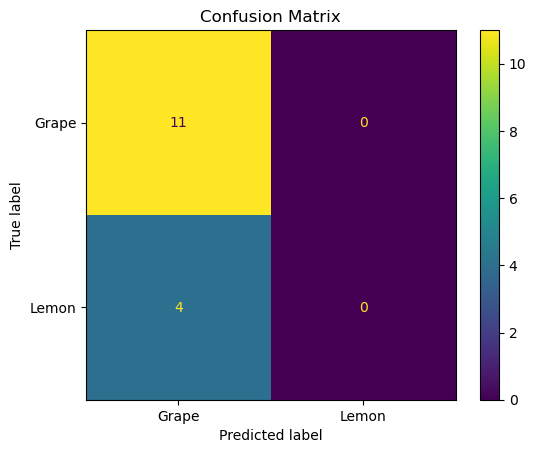

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

<AxesSubplot:>

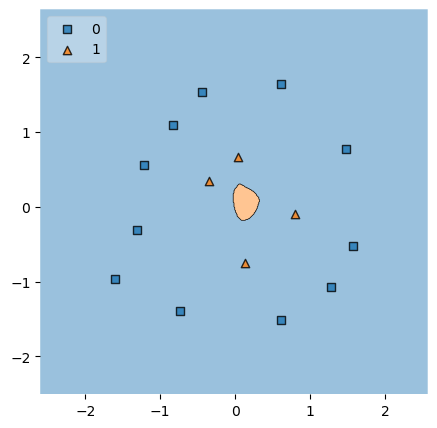

In [33]:
#Decision Regions
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(5,5))
plot_decision_regions(x_train,np.array(y_train),clf=model,legend=2)

<AxesSubplot:>

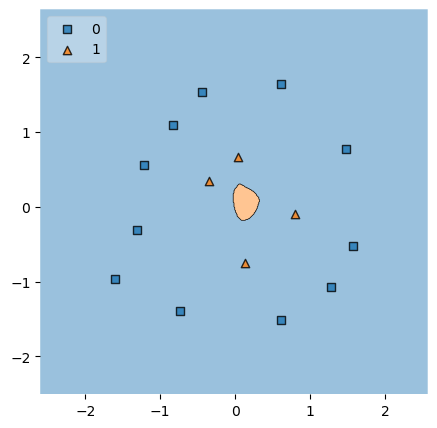

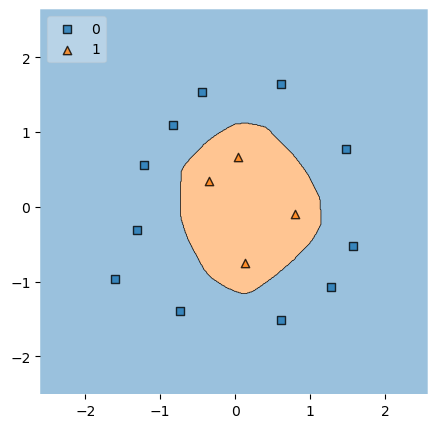

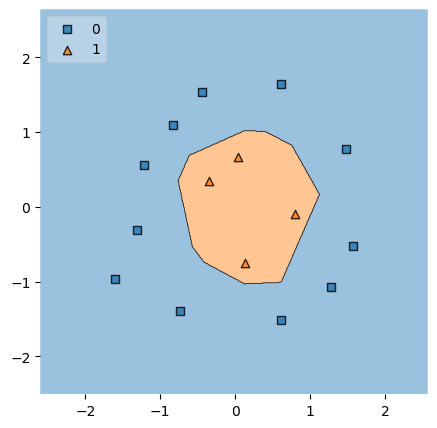

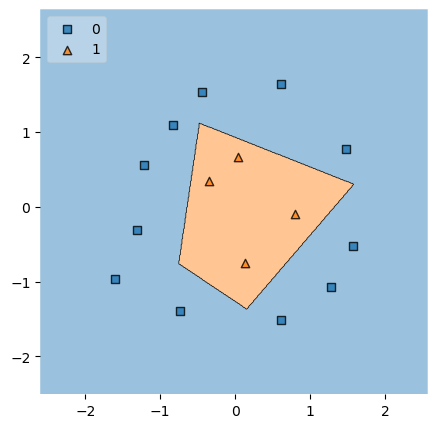

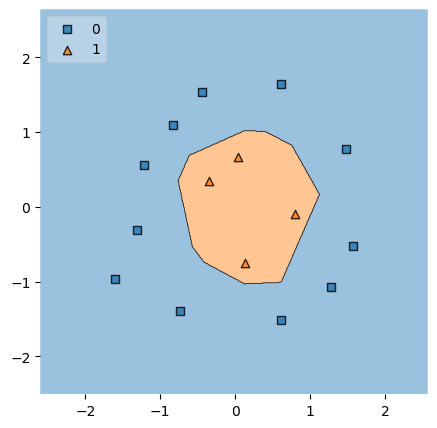

In [38]:
#Decision Regions
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(5,5))
plot_decision_regions(x_train,np.array(y_train),clf=model,legend=2)
plt.figure(figsize=(5,5))
plot_decision_regions(x_train,np.array(y_train),clf=model2,legend=2)
plt.figure(figsize=(5,5))
plot_decision_regions(x_train,np.array(y_train),clf=model3,legend=2)
plt.figure(figsize=(5,5))
plot_decision_regions(x_train,np.array(y_train),clf=model4,legend=2)
plt.figure(figsize=(5,5))
plot_decision_regions(x_train,np.array(y_train),clf=model5,legend=2)
